In [1]:
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as ppt
%matplotlib inline

AE_ROOT = '/media/sf_Masterarbeit/data/ILSVRC2012_img_train_AE_50'

classes = glob.glob(AE_ROOT + '/*_history.csv')
classes = [c.split('/')[-1] for c in classes] # strip path
classes = [c.split('_')[0] for c in classes]

num_classes = len(classes)
confusion_matrix = np.full((num_classes, num_classes), fill_value=-1, dtype=np.float)

# The confusion matrix will contain a row for each origin class, where the column corresponds to the target class
for origin_index, origin_class in enumerate(classes):
    with open(AE_ROOT + '/' + origin_class + '_history.csv') as csv_file:
        csv_reader = csv.reader(csv_file)
        for origin_pic, target_class, confidence, iterations in csv_reader:
            target_index = classes.index(target_class)
            confusion_matrix[origin_index, target_index] = confidence

In [2]:
import adex.googlenet

CAFFE_ROOT = '/home/chrisbot/Projects/caffe'

labels = adex.googlenet.load_labels(CAFFE_ROOT)
labels_sorted = []
for index, c in enumerate(classes):
    for l in labels:
        if c == l[0].strip():
            labels_sorted.append(l[1])
            break
    else:
        print('{0}:\t##### No name found for: {1} #####'.format(index, c))
        labels_sorted.append('#####NO NAME#####')
print(labels_sorted)

['Lhasa', 'pill bottle', 'Crock Pot', 'wooden spoon', 'Bouvier des Flandres', 'monastery', 'honeycomb', 'purse', 'ballpoint', 'French bulldog', 'red-breasted merganser', 'leafhopper', 'great grey owl', 'sulphur butterfly', 'American chameleon', 'lorikeet', 'standard poodle', 'file', 'Siberian husky', 'carbonara', 'balloon', 'rocking chair', 'lacewing', 'cinema', 'dome', 'sleeping bag', 'medicine chest', 'jaguar', "carpenter's kit", 'lynx', 'stupa', 'rapeseed', 'acorn', 'snail', 'ping-pong ball', 'cabbage butterfly', 'chiffonier', 'menu', 'Appenzeller', 'paper towel', 'obelisk', 'assault rifle', 'Irish wolfhound', 'conch', 'bell cote', 'water buffalo', 'groenendael', 'abaya', 'acoustic guitar', 'Afghan hound']


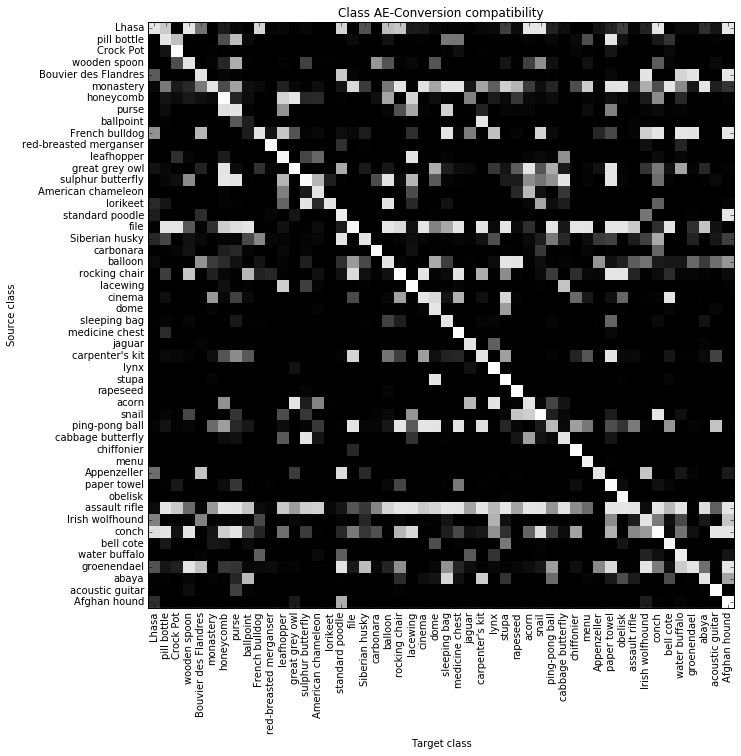

In [3]:
ppt.imshow(confusion_matrix, cmap=ppt.cm.gray, interpolation='none')
ppt.title('Class AE-Conversion compatibility')
ppt.xlabel('Target class')
ppt.ylabel('Source class')
ppt.xticks(np.arange(len(labels_sorted)), labels_sorted, rotation=90)
ppt.yticks(np.arange(len(labels_sorted)), labels_sorted)
fig = ppt.gcf()
fig.set_size_inches(18.5, 10.5)